In [ ]:
#Daniel Polak
#C00228290
#26/03/2021
#Polynomial Regression Algrithm

In [1]:
import operator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#Polynomial Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
#Decision Trees
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeRegressor
#K-Mean Clustering
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
#Neural Network
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier

In [3]:
def polynomial_regression(degree):
    #Read in a dataset using pandas
    dataset = pd.read_csv('regression_table.csv')
    dataset_x = dataset["X"]
    dataset_y = dataset["Y"]

    #Reshape data from 1D array into 2D array
    dataset_x = np.array(dataset_x).reshape(-1, 1)
    dataset_y = np.array(dataset_y).reshape(-1, 1)

    #Split data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(dataset_x, dataset_y, test_size=0.33)

    polynomial_features= PolynomialFeatures(degree=degree)
    x_poly_train = polynomial_features.fit_transform(x_train)
    x_poly_test = polynomial_features.fit_transform(x_test)

    model = LinearRegression()
    model.fit(x_poly_train, y_train)
    y_poly_pred = model.predict(x_poly_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_poly_pred))
    r2 = r2_score(x_test, y_poly_pred)
    print("RMSE of polynomial regression is ", rmse)
    print("R2 of polynomial regression is ", r2)

    plt.scatter(x_test, y_test)
    # sort the values of x before line plot
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(x_test, y_poly_pred), key=sort_axis)
    x_test, y_poly_pred = zip(*sorted_zip)
    plt.plot(x_test, y_poly_pred, color='black')
    plt.show()

RMSE of polynomial regression is  0.9421593264389058
R2 of polynomial regression is  0.020729488850471434


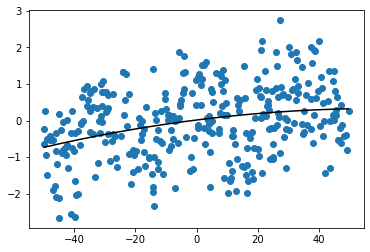

In [4]:
polynomial_regression(2)

In [5]:
def decision_tree():
    dataset = pd.read_csv('decision_trees_data.csv')

    X = dataset.drop('Class', axis=1)
    Y = dataset['Class']

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

    classifier = DecisionTreeClassifier()
    classifier.fit(X_train, Y_train)

    y_pred = classifier.predict(X_test)

    print(confusion_matrix(Y_test, y_pred))
    print(classification_report(Y_test, y_pred))
    
    regr = DecisionTreeRegressor()
    regr.fit(X_train, Y_train)

    y_pred_regr = regr.predict(X_test)

    df2 = pd.DataFrame({'Actual':Y_test, 'Predicted':y_pred_regr})
    print(df2)

In [6]:
decision_tree()

[[158   1]
 [  1 115]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       159
           1       0.99      0.99      0.99       116

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

      Actual  Predicted
566        0        0.0
302        0        0.0
106        0        0.0
50         0        0.0
667        0        0.0
...      ...        ...
854        1        1.0
254        0        0.0
316        0        0.0
563        0        0.0
1143       1        1.0

[275 rows x 2 columns]


In [7]:
def kmeanClustering():
    data = make_blobs(n_samples=400, n_features=2, centers=4, cluster_std=1.6, random_state=50)

    points = data[0]

    plt.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='viridis')
    plt.xlim(-15,15)
    plt.ylim(-15,15)
    plt.show()

    kmeans = KMeans(n_clusters=4)
    kmeans.fit(points)
    print(kmeans.cluster_centers_)
    y_km = kmeans.fit_predict(points)

    plt.scatter(points[y_km ==0,0], points[y_km == 0,1], s=100, c='red')
    plt.scatter(points[y_km ==1,0], points[y_km == 1,1], s=100, c='black')
    plt.scatter(points[y_km ==2,0], points[y_km == 2,1], s=100, c='blue')
    plt.scatter(points[y_km ==3,0], points[y_km == 3,1], s=100, c='cyan')
    plt.show()

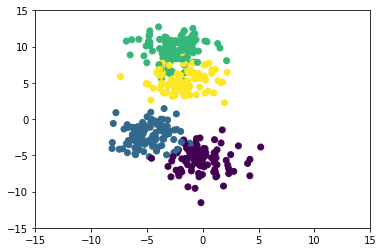

[[-2.58575308  9.9704047 ]
 [-5.01621736 -2.11522242]
 [-0.17419501 -5.53888403]
 [-1.74809641  5.54583068]]


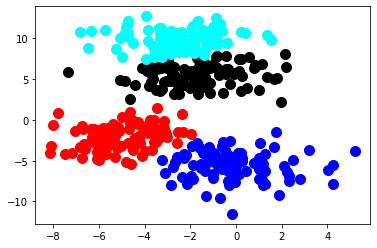

In [8]:
kmeanClustering()

In [9]:
def neuralNetworks():
    data = pd.read_csv('neural_network_data.csv')
    
    X = data.drop('species', axis=1)
    Y = data['species']

    encode_labels = LabelEncoder()

    Y = encode_labels.fit_transform(Y)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20)

    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
    mlp.fit(X_train, Y_train.ravel())

    predictions = mlp.predict(X_test)

    print(confusion_matrix(Y_test,predictions))
    print(classification_report(Y_test,predictions))

In [13]:
neuralNetworks()

[[11  0  0]
 [ 0  7  1]
 [ 0  1 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.88      0.88      0.88         8
           2       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

